# Gradient Shows Direction of Steepest Ascent

The gradient of a function "points" towards the direction at which the function increases the most. 

To see how everything works, consider a function $f(\vec{x})$ (with $\vec{x}$ and $N$-dimensional vector) evaluated at some $\vec{x} ^\prime =\vec{x} + \delta \vec{x}$ (with $\delta \vec{x}$ small). Then, we can write

$$
f(\vec{x} + \delta \vec{x}) =  f(\vec{x}) + \delta \vec{x} \cdot \vec\nabla f(\vec{x})  + \dots 
$$
with $\vec\nabla f(\vec{x}) \equiv \dfrac{\partial f(y_1,y_2,\dots,N)}{\partial y_i}\Big|_{\vec{y}=\vec{x}}$.


It becomes clear at this point that $f(\vec{x})$ becomes maximally increased when $\delta \vec{x}$ is parallel to $ \vec\nabla f(\vec{x})$, i.e. for $\vec{x}^\prime = \vec{x} + \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$). Also, $f(\vec{x})$ is maximally decreased for  $\vec{x}^\prime = \vec{x} - \alpha \ \vec\nabla f(\vec{x})$ (with some $\alpha >0$).

One can easily understand this in the case $N=1,2,3$ as we can simply draw vectors and see what happens, but you can see <a href="#1">footnote <sup>1</sup></a> for a general proof. 


### Gradient Acsent/Descent
We would like to maximize or minimize $f(\vec{x})$. To do this, we can exploit the previous observation by starting at some point $\vec{x}$ and iteratively update $\vec{x} \to \vec{x} \pm \alpha \ \vec\nabla f(\vec{x})$, until maximization ($+$) or minimization ($-$) occurs (say if $\vec\nabla f(\vec{x})$ becomes very small).  

The Gradient Acsent/Descent algorithm is maybe the simplest optimization algorith, as the only thing that needs is the derivative of the function. However, stopping conditions and local minima/maxima are a huge problem.
 
 
 
 
 
 
 <br>
 <br>
 <br>
 <br>
 <br>
 
 
---
<p id="#1" style="font-size:8pt" ><sup>1</sup>
Basically, this statement comes from the fact that for two $R^N$ vectors, $\vec{a},\vec{b}$, it holds that $|\vec{a}\cdot \vec{b}| \leq ||\vec{a}||||\vec{b}||$. Here is the proof:
<br>
We start by defining the inner product as $$\vec{a}\cdot \vec{b} \equiv \displaystyle\sum_i a_i b_i.$$ Therefore, $$\vec{a}\cdot \vec{a} = || \vec a ||^2 \geq 0.$$
<br>
With these definitions, we write
$$
\Big|\Big|\vec{x} - \dfrac{\vec{x}\cdot \vec{y}}{||\vec{y}||^2}\vec{y} \Big|\Big|^2 \geq 0 
\Rightarrow 
||\vec{x}||^2 + \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} -2 \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow \\
||\vec{x}||^2 - \dfrac{(\vec{x}\cdot \vec{y})^2}{||\vec{y}||^2} \geq 0 
\Rightarrow
(\vec{x}\cdot \vec{y})^2 \leq ||\vec{x}||^2 ||\vec{y}||^2 
\Rightarrow \\
|\vec{x}\cdot \vec{y}| \leq ||\vec{x}|| ||\vec{y}|| \;.
$$
<br>
Note also that this generalizes trivially to $C^N$ spaces to $\langle y|x \rangle \leq ||\vec{x}|| ||\vec{y}||$, with  $\langle y|x \rangle \displaystyle \sum_i y^{*}_i x_i$.
</p>

# AdaDelta


One of the things that can make GD unable to converge, is the learning rate, which has to be tunned. This can be avoided by using *AdaDelta* [[1212.5701](https://arxiv.org/abs/1212.5701)] that tries to adjust the learning as the algorithm proceeds. 

The update of $\vec{x}$, according to this is: 

$$
\vec{x}^{(t)} = \vec{x}^{(t-1)} - \delta \vec{x}^{(t)}  \;,
$$
with
$$
\delta \vec{x}^{(t)} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
where the *decaying averages* are
$$
\mathbb{E}[\delta \vec{x}^2]^{(t)} \equiv \gamma \ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} +
(1-\gamma) \ \left( \delta \vec{x}^{(t)} \right)^2 \;, 
\\
\mathbb{E}[g^2]^{(t)} \equiv \gamma \ \mathbb{E}[g^2]^{(t-1)} +
(1-\gamma) \ \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right) \cdot \left( {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \right)\;, 
$$
for $\mathbb{E}[X]^{(0)} = 0$. 

The parameters $\gamma$ and $\epsilon$ are free, but generally $\gamma \approx 1$ and $\epsilon \ll 1$. Common choice is $\gamma \approx 0.95$ and $\epsilon \ll 10^{-6}$.

### The algorithm

With these definitions, the AdaDelta algorithm is:

1. Initialize $\mathbb{E}[g^2]^{(0)} =0$ and $\mathbb{E}[\delta \vec{x}^2]^{(0)}=0$
1. Loop t=1,2,...  until some condition is satisfied
    1. Calculate ${\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[g^2]^{(t)}$
    1. Calculate $\delta \vec{x}^{t} = \dfrac{\sqrt{ \mathbb{E}[\delta \vec{x}^2]^{(t-1)} + 
    \epsilon}  }{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)})$
    1. Accumulate $\mathbb{E}[\delta \vec{x}^2]^{(t)}$
    1. Update $\vec{x}^{(t+1)} = \vec{x}^{(t)} - \delta \vec{x}^{(t)}$  
1. Done

---

## RMSprop

There is a variant of AdaDelta called *RMSprop*, which uses
$$
\delta \vec{x}^{(t)} = \dfrac{\alpha}{\sqrt{ \mathbb{E}[g^2]^{(t)} + \epsilon}} {\bf \nabla}_\vec{x} f(\vec{x}^{(t-1)}) \;, 
$$
with $\alpha \ll 1$ some constant (typically $\alpha  =10^{-3}$).


Lets make a Gradient Descent minimizer class to see how it works (maximization quite trivial once you get how it works).

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

This is how the target should look like

In [2]:
class Function:
    '''
    A base class for the function that we would like to minimize.
    You should define another class where you overload __call__ (and the Jacobian if you have an analytical form)
    '''
    def __init__(self,x0):
        '''
        x0: initial x
        '''
    
        self.x=[_ for _ in x0]#this is the current pint
        self.minimum=[_ for _ in x0]#this is to hold the absolute minimum in case GD escapes it
        
        self.dim=len(x0)
        
        self.grad=[0 for _ in x0]
        
    def __call__(self,x):
        pass
    
    def derivative(self,x,h=1e-5):
        _x=x[:]
        
        for i in range(self.dim):
            heff=np.abs(x[i])*h+h
            
            _x[i]-=heff
            f0=self(_x)
            _x[i]+=2*heff
            f1=self(_x)
            
            _x[i]-=heff

            self.grad[i]=(f1-f0)/(2*heff)

In [3]:
class GradientDescent:
    
    def __init__(self,function):
        '''
        function: instance of Function
        '''
        
        self.function=function
        self.f_min=function(function.x)

        self.steps=[]
        self.steps.append(self.function.x[:])
        self.dim=self.function.dim
    
    def run(self,abs_tol=1e-5, rel_tol=1e-3, step_break=100,max_step=5000):
        '''        
        abs_tol, rel_tol, step_break: stop when _check<1 (_check is what update should return) 
        for step_break consecutive steps
        
        max_step: maximum number of steps
        '''
        _s=0
        count_steps=1
        while count_steps<=max_step:
            _check=self.update(abs_tol, rel_tol)
            
            count_steps+=1             
                
            
            if _check<1:
                _s+=1
            else:
                _s=0
            
            if _s>step_break:
                break

In [4]:
class VanillaGD(GradientDescent):
    def __init__(self,function,alpha=1e-2):
        '''
        function: instance of Function
        alpha: the learning rate
        '''
        GradientDescent.__init__(self,function)
        
        self.alpha=alpha

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        
        
        _x2=0
        _check=0
                        
        self.function.derivative(self.function.x)
        
        for i in range(self.dim):
            dx=self.alpha*self.function.grad[i]
            
            self.function.x[i]=self.function.x[i]-dx

            _x2=abs_tol + np.abs(self.function.x[i]) * rel_tol
            _check+=(dx/_x2)*(dx/_x2)

        _check=np.sqrt(1./self.dim *_check)

        self.steps.append(self.function.x[:])
        
        
        tmp_min=self.function(self.function.x)
        if tmp_min<self.f_min:
            self.function.minimum=self.function.x[:]
            self.f_min=tmp_min
            
        return _check


In [5]:
class RMSpropGD(GradientDescent):
    '''Implementation of RMSprop.'''

    def __init__(self,function,gamma=0.95,epsilon=1e-6,alpha=1e-3):
        '''
        function: instance of Function
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        alpha: learning rate
        '''
        GradientDescent.__init__(self,function)


        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha

        
        # counters for the decaying means of the gradient     
        self.gE=[0 for _ in range(self.dim)]

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        _x2=0
        _check=0
                        
        self.function.derivative(self.function.x)

        for i in range(self.dim):
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*self.function.grad[i]**2 
            dx=self.alpha/np.sqrt( (self.gE[i]+self.epsilon)  )*self.function.grad[i]
            
            self.function.x[i]=self.function.x[i]-dx

            _x2=abs_tol + np.abs(self.function.x[i]) * rel_tol
            _check+=(dx/_x2)*(dx/_x2)

        _check=np.sqrt(1./self.dim *_check)

        self.steps.append(self.function.x[:])
 
        tmp_min=self.function(self.function.x)
        if tmp_min<self.f_min:
            self.function.minimum=self.function.x[:]
            self.f_min=tmp_min
            
        return _check


In [6]:
class AdaDeltaGD(GradientDescent):
    '''Implementation of AdaDelta.'''
    
    def __init__(self,function,gamma=0.95,epsilon=1e-6,alpha=1):
        '''
        function: instance of Function
        gamma: the decaying parameter
        epsilon: safety parameter (to avoid division by 0)
        '''
        GradientDescent.__init__(self,function)

        self.gamma=gamma
        self.epsilon=epsilon
        self.alpha=alpha
        
        # counters for the decaying means of the gradient and dx         
        self.gE=[0 for _ in range(self.dim)]
        self.dxE=[0 for _ in range(self.dim)]

    def update(self,abs_tol=1e-5, rel_tol=1e-3):
        '''
        update should return a number that when it is smaller than 1
        the main loop stops. Here I choose this number to be:
        sqrt(1/dim*sum_{i=0}^{dim}(grad/(abs_tol+x*rel_tol))_i^2)
        '''
        _x2=0
        _check=0

        self.function.derivative(self.function.x)
        
        for i in range(self.dim):
            
            self.gE[i]=self.gamma*self.gE[i] + (1-self.gamma)*self.function.grad[i]**2 
            dx=np.sqrt( (self.dxE[i]+self.epsilon)/(self.gE[i]+self.epsilon)  )*self.function.grad[i]*self.alpha
            
            self.dxE[i]=self.gamma*self.dxE[i] + (1-self.gamma)*dx**2
            
            self.function.x[i]=self.function.x[i] - dx
            
            
            _x2=abs_tol + np.abs(self.function.x[i]) * rel_tol
            _check+=(dx/_x2)*(dx/_x2)
            self.function.grad[i]=0

        _check=np.sqrt(1./self.dim *_check)
        
        self.steps.append(self.function.x[:])
        
        tmp_min=self.function(self.function.x)
        if tmp_min<self.f_min:
            self.function.minimum=self.function.x[:]
            self.f_min=tmp_min
            
        return _check


In [7]:
class func(Function):
    def __init__(self,x0):
        Function.__init__(self,x0)
    
    def __call__(self,x):
        return (x[0]-1)**2+(x[1]-x[0])**2


In [8]:
f=func([-1,3])

In [9]:
GD=VanillaGD(f,alpha=1e-3)
# GD=RMSpropGD(f,gamma=0.995,epsilon=1e-6,alpha=1e-2)
# GD=AdaDeltaGD(f,gamma=0.99,epsilon=1e-5,alpha=1)

In [10]:
GD.run(abs_tol=1e-3, rel_tol=1e-2, step_break=5000,max_step=500000)
len(GD.steps),f.x,f.minimum

(5157,
 [1.0066420528335602, 1.0107470672489678],
 [1.0066420528335602, 1.0107470672489678])

<IPython.core.display.Javascript object>


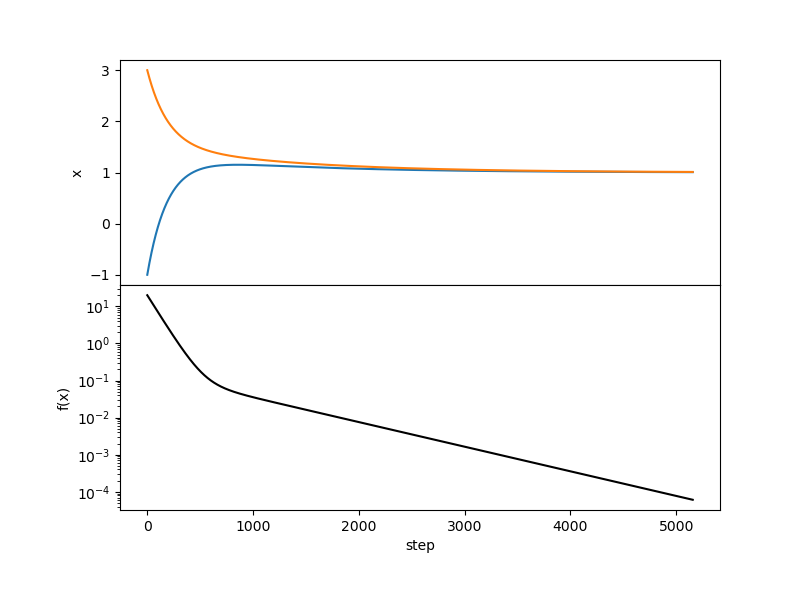

In [11]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)

sub.plot(GD.steps)

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')

sub = fig.add_subplot(212)
# sub.get_xaxis().set_visible(False)

F=[f(x) for x in GD.steps]
sub.plot(F ,c='xkcd:black')

sub.set_ylabel('f(x)')
sub.set_xlabel('step')
sub.set_yscale('log')

plt.show()